In [1]:
!pip install tensorflow
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
 3   length  31962 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 998.9+ KB


<AxesSubplot:xlabel='length', ylabel='count'>

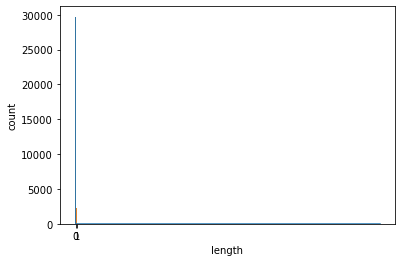

In [2]:
train=pd.read_csv("https://raw.githubusercontent.com/samathapilli/mastersproject/main/train.csv")
train.head()
train["length"]=train["tweet"].apply(len)
train.head()
train.info()
train.isnull().sum()
train=train.drop(["id"],axis=1)
sns.countplot(train["label"])
sns.distplot(train["length"])

In [3]:
nltk.download('stopwords')
stop=stopwords.words("english")
def stop_words(df):
    df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
    print(df[['tweet','stopwords']].head())
    
stop_words(train)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               tweet  stopwords
0   @user when a father is dysfunctional and is s...         10
1  @user @user thanks for #lyft credit i can't us...          5
2                                bihday your majesty          1
3  #model   i love u take with u all the time in ...          5
4             factsguide: society now    #motivation          1


In [4]:
def punctuation_removal(df):
    df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
    print(df['tweet'].head())
    
punctuation_removal(train)

0     user when a father is dysfunctional and is so...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model   i love u take with u all the time in u...
4                 factsguide society now    motivation
Name: tweet, dtype: object


In [5]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:10]
freq

user    17473
the     10139
to       9825
a        6416
i        5745
you      5407
and      4871
in       4638
for      4479
is       4176
dtype: int64

In [6]:
freq = list(freq.index)

In [7]:
def frequent_words_removal(df):  
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    print(df['tweet'].head())
    
frequent_words_removal(train)

0    when father dysfunctional so selfish he drags ...
1    thanks lyft credit cant use cause they dont of...
2                                  bihday your majesty
3       model love u take with u all time urð ðððð ððð
4                    factsguide society now motivation
Name: tweet, dtype: object


In [8]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-10:]
freq

freq = list(freq.index)
def rare_words_removal(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    print(df['tweet'].head())
    
rare_words_removal(train)

stemmer=PorterStemmer()

0    when father dysfunctional so selfish he drags ...
1    thanks lyft credit cant use cause they dont of...
2                                  bihday your majesty
3       model love u take with u all time urð ðððð ððð
4                    factsguide society now motivation
Name: tweet, dtype: object


In [9]:
corpus=[]
for i in range(len(train)):
    #replacing everything other than alphabets with a space
    review=re.sub("[^a-zA-Z]"," ",str(train["tweet"][i]))
    #Lowering the tweets
    review=review.lower()
    #Converting in a list
    review=review.split()
    #Finding and removing stopwords
    review=[stemmer.stem(word) for word in review if not word in set(stopwords.words("english"))]
    #Joining after removal of stopwords
    review=" ".join(review)
    corpus.append(review)

In [10]:
corpus

['father dysfunct selfish drag kid dysfunct run',
 'thank lyft credit cant use caus dont offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguid societi motiv',
 'huge fan fare big talk leav chao pay disput get allshowandnogo',
 'camp tomorrow danni',
 'next school year year exam cant think school exam hate imagin actorslif revolutionschool girl',
 'love land allin cav champion cleveland clevelandcavali',
 'welcom im gr',
 'ireland consum price index mom climb previou may blog silver gold forex',
 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
 'get see daddi today day gettingf',
 'cnn call michigan middl school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
 'ouchjunior angri got junior yugyoem omg',
 'thank paner thank posit',
 'retweet agre',
 'friday smile around via ig cooki make peopl',
 'know essenti oil made ch

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv=TfidfVectorizer()
X=tfv.fit_transform(corpus).toarray()
y=train["label"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,y_train.shape
X_test.shape,y_test.shape


((6393, 33170), (6393,))

In [12]:

classifier=MultinomialNB()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

confusion_matrix(y_pred,y_test)

acc_MNB=accuracy_score(y_pred,y_test)
acc_MNB

0.9435319881119975

In [13]:
classifier_gnb = GaussianNB()
classifier_gnb.fit(X_train, y_train)

y_pred_np = classifier_gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_np)
print(cm)

[[4890 1095]
 [ 143  265]]


In [ ]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

y_pred_dt = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

In [ ]:
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

y_pred_lr = classifier_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

y_pred_rf = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)